# Phase diff of incoming tilted,shifted Gaussian on local Gaussian for inf. half-plane PD

To second-order in $\alpha$, the expression is

\begin{align*}
		\sum_{n,m} u_{nm}(x,y,0)=&
			\left[
				1+
				i \frac{ k a \alpha}{ 2}
			\right]
			u_{00}
			+
			\left[
			\frac{a}{w_{0}}		
			+
			i  \frac{k w_{0} \alpha}{2}	
			\right]			
			u_{10}
			+
			i  
				\frac{\sqrt{2} k a \alpha}{ 2}
			u_{20}
			\\  &
	-\alpha^2  (k w_0)^2 
		[ \frac{1}{2 \sqrt{2}} u_{20}
		+
		\frac{1}{4} u_{00}
		]	
		-\alpha^2  (k^2 a w_0)
	[	
	 \frac{ 1} {4} u_{30}
	+ \frac{3}{4} u_{10}
	]
				 \; .
\end{align*}

In [3]:
import sys
sys.path.append('../')

import PauLisa as pl, numpy as np, matplotlib.pyplot as plt
from scipy.special import erfi as erfi
pi=np.pi

### input

In [22]:
#spot, wavelength, shift
w= 1e-3
lam= 1064e-9
a = 0e-6  #100 micron shift
k = 2*pi/lam
zr = pi*w**2/lam

#alpha(10nrad)
alpha_min=-500e-6
alpha_max=500e-6
num_points = 1000
alpha = np.linspace(alpha_min,alpha_max,num = num_points)

## PLOT SCALES AND LABELS
micro = 10**(6)
nano = 10**(9)
cycle = 1/(2*pi)
rad = 1
xlab = 'u'
ylab = 'rad'

##SET SCALES
alpha_scale = micro
phase_scale = rad

if(alpha_scale==nano):
    xlab = 'n'
if(phase_scale==cycle):
    ylab = 'cycles'

### phase diff vs. angle

# 2nd order tilt

The phase difference:

\begin{align*}
	\Delta \phi = &
		 \frac{1}{2} 
		 \left[
		 	\phi_R - \phi_L
		 \right]
		 \\ = &
		 \frac{1}{2}
		 \left[
							\arctan
				\left[
					\frac
					{ \frac{\pi \alpha}{\lambda}
					\left[
						a 
						+
						\sqrt{\frac{2}{\pi}} w_0
					\right]}					
				{1
				+
				 \sqrt{\frac{2}{\pi}} \frac{a}{w_0}
				 		-\frac{1}{16}\alpha^2 k^2 
	[
	 w_0^2
	+ 
	a w_0(
	\frac{3 \sqrt{2}-4}{\sqrt{\pi}}
	)
	]			 
				 }
				\right]
		-
			\arctan
				\left[
					\frac
					{ \frac{\pi \alpha}{\lambda}
					\left[
						a 
						-
						\sqrt{\frac{2}{\pi}} w_0
					\right]}					
				{1
				-
				 \sqrt{\frac{2}{\pi}} \frac{a}{w_0}
	-\frac{1}{16}
	\alpha^2 k^2 
	[
	  w_0^2
	- 
	a w_0(
\frac{3 \sqrt{2}-4}{\sqrt{\pi}}
	)
	]			 
				 }
				\right]
			\right]							 	
\end{align*}

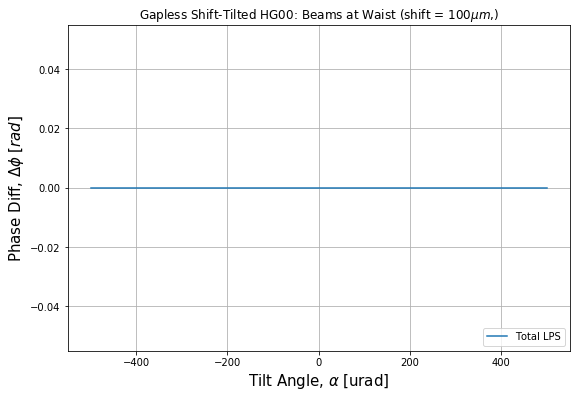

In [21]:
#function    
def phase_diff(alpha):
    phase_result=(0.50*(phi_r(alpha)-phi_l(alpha) ))
    return(phase_result)

def gws(alpha):
    gws_result=(0.50*(phi_r(alpha)+phi_l(alpha) ))
    return(gws_result)

def gws_total(alpha):
    gws_total_result=(0.50*np.arctan(c_r(alpha)+c_l(alpha)))/k
    return(gws_total_result)

def gws_total2(alpha):
    gws_total_result=(0.50*(c(alpha))/k)
    return(gws_total_result)

def second_order_tilt_r(alpha):
    result= ((1/16)*alpha**2 * k**2 * 
                        (
                            w**2 + a*w* ( (3*np.sqrt(2)-4)/np.sqrt(pi))
                        )
            )
    return(result)

def second_order_tilt_l(alpha):
    result= ((1/16)*alpha**2 * k**2 * 
                        (
                            w**2 - a*w* ( (3*np.sqrt(2)-4)/np.sqrt(pi))
                        )
            )
    return(result)

def phi_r(alpha):
    return(np.arctan 
            (
                (
                    (pi*alpha/lam)*
                    (
                        a
                        +
                        np.sqrt(2/pi)*w
                    )
                )  
                    /
                    (
                        1
                        +
                        np.sqrt(2/pi)*(a/w)
                        -
                        second_order_tilt_r(alpha)
                    )
            )
    )

def phi_l(alpha):
    return(np.arctan 
        (
            (
                (pi*alpha/lam)*
                (
                    a
                    -
                    np.sqrt(2/pi)*w
                )
            )  
                /
            (
                    1
                    -
                    np.sqrt(2/pi)*(a/w)
                    -
                    second_order_tilt_l(alpha)
            )
        )
    )

def c_r(alpha):
    return(
            (
                (
                    (pi*alpha/lam)*
                    (
                        a
                        +
                        np.sqrt(2/pi)*w
                    )
                )  
                    /
                    (
                        1
                        +
                        np.sqrt(2/pi)*(a/w)
                        -
                        second_order_tilt_r(alpha)
                    )
            )
    )    

def c_l(alpha):
    return(
        (
            (
                (pi*alpha/lam)*
                (
                    a
                    -
                    np.sqrt(2/pi)*w
                )
            )  
                /
            (
                    1
                    -
                    np.sqrt(2/pi)*(a/w)
                    -
                    second_order_tilt_l(alpha)
            )
        )
    )

def c(alpha):
    return(
        (
            (
                (pi*alpha/lam)*
                (
                    a
                    -
                    np.sqrt(2/pi)*w
                )
                +
                (pi*alpha/lam)*
                    (
                        a
                        +
                        np.sqrt(2/pi)*w
                    )
            )  
                /
            (
                    1
                    -
                    np.sqrt(2/pi)*(a/w)
                    -
                    second_order_tilt_l(alpha)
                +
                    1
                    +
                    np.sqrt(2/pi)*(a/w)
                    -
                    second_order_tilt_r(alpha)
            )
        )
    )

#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

# plt.plot(alpha*alpha_scale, phase_diff(alpha), label='DWS') 
plt.plot(alpha*alpha_scale, gws_total2(alpha), label='Total LPS') 

plt.legend(loc='lower right')

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]', fontsize=15) 
plt.ylabel(r'Phase Diff, $\Delta \phi\;[' + ylab + ']$', fontsize=15) 
plt.title(r'Gapless Shift-Tilted HG00: Beams at Waist (shift = 100$\mu m$,)') 
plt.grid() 
# plt.savefig("tilt-shift-waist-2tilt.pdf")


In [23]:
print(100e-6**2*100e-3/(4*zr*k))

1.4338163339594507e-17


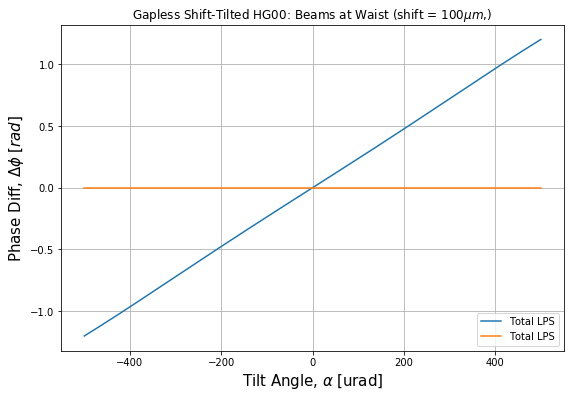

In [14]:
#function    
def phase_diff(alpha):
    phase_result=(0.50*(phi_r(alpha)-phi_l(alpha) ))
    return(phase_result)

def gws(alpha):
    gws_result=(0.50*(phi_r(alpha)+phi_l(alpha) ))
    return(gws_result)

def gws_total(alpha):
    gws_total_result=(0.50*np.arctan(c_r(alpha)+c_l(alpha)))/k
    return(gws_total_result)

def second_order_tilt_r(alpha):
    result= ((1/16)*alpha**2 * k**2 * 
                        (
                            w**2 + a*w* ( (3*np.sqrt(2)-4)/np.sqrt(pi))
                        )
            )
    return(result)

def second_order_tilt_l(alpha):
    result= ((1/16)*alpha**2 * k**2 * 
                        (
                            w**2 - a*w* ( (3*np.sqrt(2)-4)/np.sqrt(pi))
                        )
            )
    return(result)

def phi_r(alpha):
    return(np.arctan 
            (
                (
                    (pi*alpha/lam)*
                    (
                        a
                        +
                        np.sqrt(2/pi)*w
                    )
                )  
                    /
                    (
                        1
                        +
                        np.sqrt(2/pi)*(a/w)
                        -
                        second_order_tilt_r(alpha)
                    )
            )
    )

def phi_l(alpha):
    return(np.arctan 
        (
            (
                (pi*alpha/lam)*
                (
                    a
                    -
                    np.sqrt(2/pi)*w
                )
            )  
                /
            (
                    1
                    -
                    np.sqrt(2/pi)*(a/w)
                    -
                    second_order_tilt_l(alpha)
            )
        )
    )

def c_r(alpha):
    return(
            (
                (
                    (pi*alpha/lam)*
                    (
                        a
                        +
                        np.sqrt(2/pi)*w
                    )
                )  
                    /
                    (
                        1
                        +
                        np.sqrt(2/pi)*(a/w)
                        -
                        second_order_tilt_r(alpha)
                    )
            )
    )    

def c_l(alpha):
    return(np.arctan 
        (
            (
                (pi*alpha/lam)*
                (
                    a
                    -
                    np.sqrt(2/pi)*w
                )
            )  
                /
            (
                    1
                    -
                    np.sqrt(2/pi)*(a/w)
                    -
                    second_order_tilt_l(alpha)
            )
        )
    )

#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

# plt.plot(alpha*alpha_scale, phase_diff(alpha), label='DWS') 
plt.plot(alpha*alpha_scale, phase_diff(alpha), label='Total LPS') 
plt.plot(alpha*alpha_scale, gws(alpha), label='Total LPS') 

plt.legend(loc='lower right')

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]', fontsize=15) 
plt.ylabel(r'Phase Diff, $\Delta \phi\;[' + ylab + ']$', fontsize=15) 
plt.title(r'Gapless Shift-Tilted HG00: Beams at Waist (shift = 100$\mu m$,)') 
plt.grid() 
# plt.savefig("tilt-shift-waist-2tilt.pdf")


### Computed Deriv. (just checking the previous)
$\frac{d \Delta \phi}{d \alpha}$

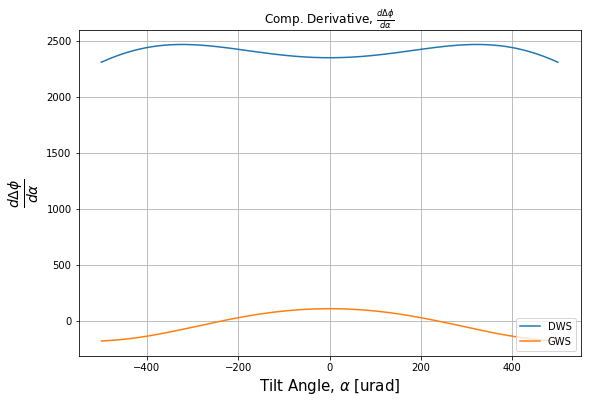

In [7]:
#function
comp_phase_diff_deriv = np.diff(phase_diff(alpha)) / np.diff(alpha)
comp_dws_deriv = np.diff(gws(alpha)) / np.diff(alpha)
alpha2 = (alpha[:-1] + alpha[1:]) / 2

#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha2*alpha_scale, comp_phase_diff_deriv*phase_scale, label='DWS') 
plt.plot(alpha2*alpha_scale, comp_dws_deriv*phase_scale, label='GWS')
plt.legend(loc='lower right')
plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]',fontsize=15) 
plt.ylabel(r'$ \frac{d \Delta \phi}{d \alpha}$', fontsize=20) 
plt.title(r'Comp. Derivative, $\frac{d \Delta \phi}{d \alpha}$') 
plt.grid()
# plt.savefig("tilt-shift-waist-2tilt-DER.pdf")


In [8]:
print(2*pi*a/(2*lam))

295.2624674426497


In [9]:
print(1/16*500e-6**2 * k**2 *(w**2 + 2*np.sqrt(2/pi)*a*w))

0.6318239241449928
